# CDDP Tutorial - Pendulum

This notebook shows how to use the CDDP algorithm to solve the pendulum swing-up problem.
© Tomohiro Sasaki, 2023

In [ ]:
import Pkg 
Pkg.activate(@__DIR__)
Pkg.instantiate()

In [ ]:
using Plots; gr()
using LinearAlgebra
using BenchmarkTools
using Printf
using Revise
using CDDP

In [9]:
includet("../src/models/pendulum.jl")
model = Pendulum()
x_dim, u_dim = model.x_dim, model.u_dim

tf = model.tf
tN = model.tN
dt = model.dt

x_init = model.x_init
x_final = model.x_final
;

In [18]:
function ell_cost(
    x::Vector,
    u::Vector,
    x_ref::Vector{Float64};
)
    
    Q = 1.0e-2*Diagonal(ones(x_dim))
    R = 1.0e-1*Diagonal(ones(u_dim))
    return  0.5 * transpose(x - x_ref) * Q * (x - x_ref) + 0.5 * transpose(u) * R * u
end

function phi_cost(
    x::Vector,
    x_final::Vector{Float64};
)
    Qf = 1.0e+3*Diagonal(ones(x_dim))
    return 0.5 * transpose(x - x_final) * Qf * (x - x_final)
end
;

In [19]:

X0, U0 = initialize_trajectory(model);

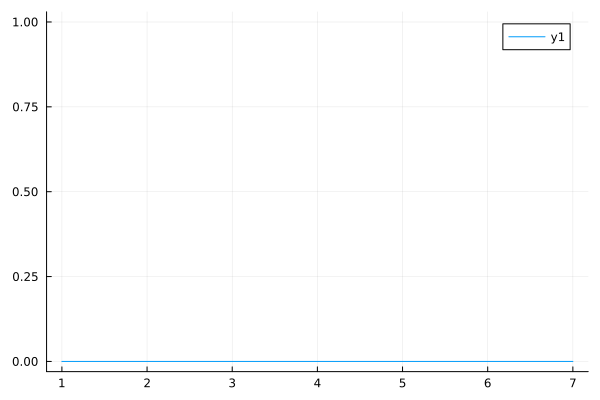

In [20]:
plot(X0[1,:])

In [28]:
prob = iLQRProblem(model, tf, tN, dt, x_dim, u_dim, ell_cost, phi_cost, model.f!, empty, x_init, x_final, nothing)
sol = solve_ilqr(prob, X=X0, U=U0, reg_param_x=0e-5, reg_param_x_fact=10.0, reg_param_u=1e-3, reg_param_u_fact=10.0, max_ite=2)

X, U, J, gains = sol.X, sol.U, sol.J, sol.gains;
X_ilqr, U_ilqr, J_ilqr, gains_ilqr = sol.X, sol.U, sol.J, sol.gains;

**************************************************************************************
>>> Start iLQR Problem Solver 
**************************************************************************************
iter    objective 
                
0       4934.802201,  
                
1       2552.367854,  
                


**************************************************************************************
>>> Successfully Finished iLQR Problem Solver <<< 
**************************************************************************************


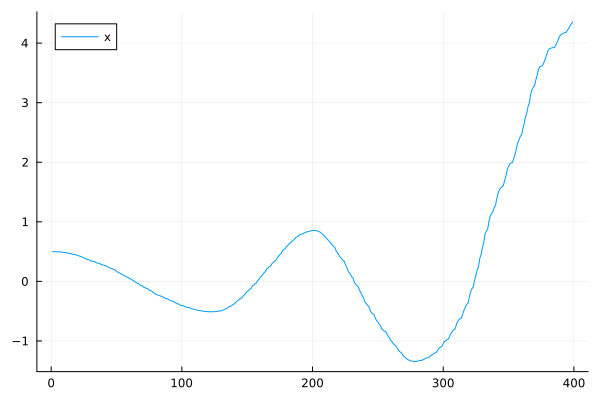

In [22]:
plot(X_ilqr[1,:], label="x")